# Random Forest Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning
1. Handling Missing Values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [7]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [8]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [9]:
# Check the missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [10]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [11]:
df[features_with_na]

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,Self Enquiry,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,Company Invited,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,Self Enquiry,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,Company Invited,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,Self Enquiry,8.0,3.0,4.0,1.0,0.0,18468.0
...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,9.0,5.0,4.0,2.0,1.0,26576.0
4884,28.0,Company Invited,31.0,5.0,3.0,3.0,2.0,21212.0
4885,52.0,Self Enquiry,17.0,4.0,4.0,7.0,3.0,31820.0
4886,19.0,Self Enquiry,16.0,4.0,3.0,3.0,2.0,20289.0


In [12]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [15]:
df.drop('CustomerID',axis=1,inplace=True)

## Feature Engineering

### Feature Extraction

In [16]:
# Create new column for feature
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [17]:
# Get all numerical features
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("Total number of numerical features: ",len(num_features))

Total number of numerical features:  12


In [18]:
# Get categorical features
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("Total number of categorical features: ",len(cat_features))

Total number of categorical features:  6


In [19]:
## Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print("Total number of discrete features: ",len(discrete_features))

Total number of discrete features:  9


In [20]:
## Continuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print("Total number of Continuous features: ",len(continuous_features))

Total number of Continuous features:  3


In [21]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
X['DurationOfPitch'] = pd.to_numeric(X['DurationOfPitch'], errors='coerce')

In [24]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [27]:
# Create column transformer with 3 types of transformers
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_features=X.select_dtypes(include="object").columns
num_features=X.select_dtypes(exclude="object").columns
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [28]:
X_train.dtypes

Age                       float64
TypeofContact              object
CityTier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                     object
NumberOfFollowups         float64
ProductPitched             object
PreferredPropertyStar     float64
MaritalStatus              object
NumberOfTrips             float64
Passport                    int64
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                object
MonthlyIncome             float64
TotalVisiting             float64
dtype: object

In [29]:
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [30]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [31]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

# Random Forest Training

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [38]:
models={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}
for i in range(len(list(models))):
    # Model Train
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    # Model Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    # Train performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    # Test performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')


Logistic Regression
Model performance for Training set
- Accuracy: 0.8458
- F1 score: 0.8200
- Precision: 0.6994
- Recall: 0.3032
- Roc Auc Score: 0.6366
----------------------------------
Model performance for Test set
- Accuracy: 0.8354
- F1 score: 0.8078
- Precision: 0.6829
- Recall: 0.2932
- Roc Auc Score: 0.6301


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9059
- F1 score: 0.9048
- Precision: 0.7765
- Recall: 0.7277
- Roc Auc Score: 0.8385


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9274
- F1 score: 0.9219
- Precision: 0.9615
- Recall: 0.6545
- Roc Auc Score: 0.8240




# Hyperparameter Tuning

In [39]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [40]:
randomcv_models=[("RF",RandomForestClassifier(),rf_params)]

In [42]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [43]:
models={
    "Random Forest": RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None)
}
for i in range(len(list(models))):
    # Model Train
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    # Model Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    # Train performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    # Test performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9346
- F1 score: 0.9301
- Precision: 0.9704
- Recall: 0.6859
- Roc Auc Score: 0.8404




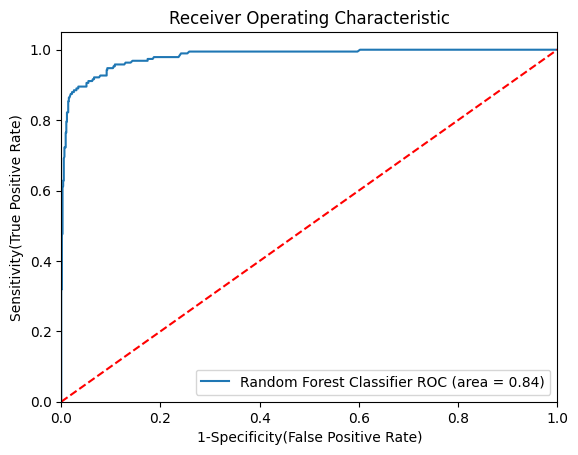

In [ ]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()
auc_models=[
    {
        'label':'Random Forest Classifier',
        'model':RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None),
        'auc':0.8404
    }
]
# Create loop through all model
for algo in auc_models:
    model=algo['model']
    model.fit(X_train,y_train)
    # Compute false positive rate, true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig("auc.png")
plt.show()